### Stock Prediction - Linear and Polynomial Regression Model

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import packages
import pandas as pd
import numpy as np
import os
import datetime
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#to plot within notebook
import matplotlib.pyplot as plt

In [2]:
# Data Start and end date
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 12, 10)

Let's get the historical data using web. For simplicity of model, we will be using only Date and Close columns. 

In [3]:
# Get data from yahoo portal
jpm_df = web.DataReader("JPM", 'yahoo',start, end)

# Sample results
jpm_df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,50.250000,48.083332,49.833332,48.583332,12019200.0,26.016140
2000-01-04,47.458332,46.125000,47.083332,47.250000,11723400.0,25.445301
2000-01-05,48.375000,46.000000,46.833332,46.958332,8714550.0,25.288227


In [4]:
# Check last records
jpm_df.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-08,122.330002,120.760002,121.040001,122.000000,9592100.0,121.127670
2020-12-09,123.300003,120.440002,123.169998,121.050003,13073900.0,120.184471
2020-12-10,120.779999,119.559998,119.989998,120.269997,13668400.0,119.410042


### Regression Model - I

In [5]:
# Copy main stock df
df = jpm_df.copy()

In [6]:
# Convert dates into number of days as dates cannot be passed directly to the regression model
df.index = (df.index - pd.to_datetime('2000-01-01')).days

In [7]:
# Check sample data
df.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2,50.250000,48.083332,49.833332,48.583332,12019200.0,26.016140
3,47.458332,46.125000,47.083332,47.250000,11723400.0,25.445301
4,48.375000,46.000000,46.833332,46.958332,8714550.0,25.288227


In [8]:
# Convert the pandas series into numpy array
X = np.asarray(df.index.values)
y = np.asarray(df['Close'])

In [9]:
# Model initialization 
reg_model = LinearRegression() 

In [10]:
# Fit the data(train the model)
reg_model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Prediction for historical dates. Let's call it predicted values by regression model
y_pred = reg_model.predict(X.reshape(-1, 1))

In [12]:
# Let's predict data for next two years or 730 days (365*2). Will need to add index range for future days 
futureindex = np.asarray(pd.RangeIndex(start=X[-1], stop=X[-1] + 730))

In [13]:
# Predict stock value for the future dates 
y_future = reg_model.predict(futureindex.reshape(-1, 1))

In [14]:
# Get last day of future stock prediction 
lastday = pd.to_datetime(futureindex[-1], origin='2000-01-01', unit='D',errors='coerce')

In [15]:
# Print the last predicted value
print (f"JPM stock predicted closing price on {str(lastday)[:10]} is ${round(y_future[-1][0],2)}")

JPM stock predicted closing price on 2022-12-09 is $98.57


In [16]:
# Convert the days index back to dates index for plotting the graph
X = pd.to_datetime(df.index, origin='2000-01-01', unit='D')
future_X = pd.to_datetime(futureindex, origin='2000-01-01', unit='D')

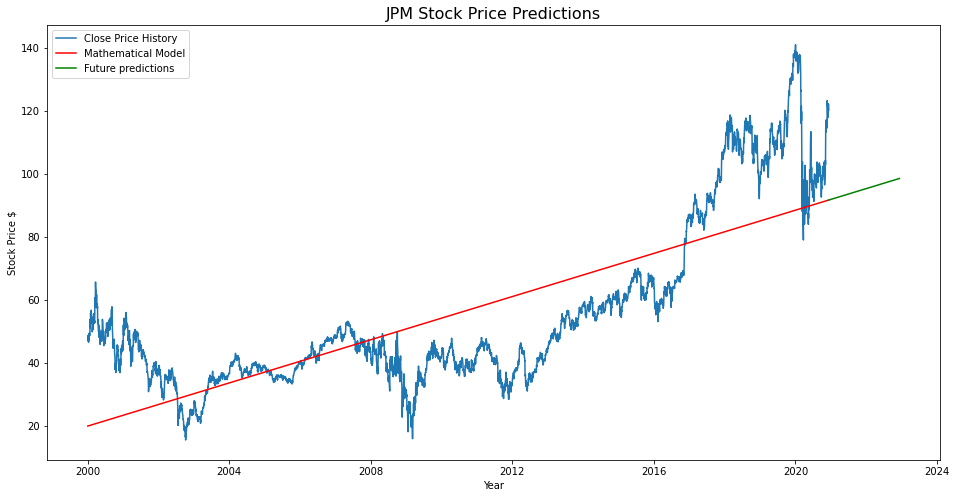

In [17]:
# Set plot figure size
plt.figure(figsize=(16,8))

# Plot the actual data
plt.plot(X,df['Close'], label='Close Price History')

# Plot the regression model line
plt.plot(X,y_pred, color='r', label='Mathematical Model')

# Plot the future predictions
plt.plot(future_X,y_future, color='g', label='Future predictions')

# Label the chart
plt.title('JPM Stock Price Predictions', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price $')

# Show legends
plt.legend()

# Show the chart
plt.show()

#### The coefficient of determination (𝑅²):
It gives amount of variation in y can be explained by the dependence on X using the particular regression model. 
Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

The value 𝑅² = 1 corresponds to the sum of squared residuals (SSR) = 0, that is to the perfect fit since the values of predicted and actual responses fit completely to each other.

In [18]:
# Print Coefficient of determination 
print('Coefficient of determination:',round(metrics.r2_score(y, y_pred),2))

Coefficient of determination: 0.61


In [19]:
print("Linear regression equation is: Y =",round(reg_model.coef_[0][0],2), "* X + ", round(reg_model.intercept_[0],2))

Linear regression equation is: Y = 0.01 * X +  19.87


#### RMSE (root-mean-square error):
The most commonly used metric for regression tasks is RMSE (root-mean-square error). This is defined as the square root of the average squared distance between the actual score and the predicted score:

In [20]:
print("RMSE (root-mean-square error) is:",round(np.sqrt(metrics.mean_squared_error(y, y_pred)),2))

RMSE (root-mean-square error) is: 16.75


#### Mean Squared Error:
Mean Squared Error is difference between of the estimated values and what you get as a result. The predicted value is based on some equation and tell what you will expect as an average but the result you get might differ from this prediction which is a slight error from the estimated value. This difference is called MSE. This determines how good is the estimation based on your equation.

In [21]:
print("Mean Squared Error is:", round(metrics.mean_squared_error(y, y_pred),2))

Mean Squared Error is: 280.58


#### Mean Absolute Error:
Mean Absolute Error is the measure of the difference between the two continuous variables. The MAE is the average vertical distance between each actual value and the line that best matches the data. MAE is also the average horizontal distance between each data point and the best matching line.

In [22]:
print("Mean Absolute Error is:" , round(metrics.mean_absolute_error(y, y_pred),2))

Mean Absolute Error is: 13.46


#### Conclusion:

X-axis of the graph shows the dates from year 2002 through 2020 and the Y-axis shows the market closing price.

The graph in the blue color displays the close price history from year 2002 to year 2020. The graph in the red represents the best fit linear equation for the known data. The graph in the green is the future predictions for next two years.

As we know linear regression line has positive slope means price will go up which is simply not realistic. Note that we have used only date as feature to predict the stock price. A simple linear equation with first degree polynomial y = mx + c cannot realistically mimic the stock market behavior.  

### Polynomial Regression Model

Polynomial regression fits a nonlinear relationship between the independent variable values and the corresponding conditional mean of  dependent variable. 

Let's try polynomial equation of degree three as a mathematical model.  Let's see, how does it perform and what are its predictions. The equation of degree three is 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥 + 𝑏₂𝑥² + 𝑏₃𝑥³ 

In [23]:
# Import polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [24]:
# Copy main stock df
df = jpm_df.copy()

In [25]:
# Convert dates into number of days as dates cannot be passed directly to the regression model
df.index = (df.index - pd.to_datetime('2000-01-01')).days

In [26]:
# Convert the pandas series into numpy array, we need to further massage it before sending it to regression model
X = np.asarray(df.index.values)
y = np.asarray(df['Close'])

In [27]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2,50.250000,48.083332,49.833332,48.583332,12019200.0,26.016140
3,47.458332,46.125000,47.083332,47.250000,11723400.0,25.445301
4,48.375000,46.000000,46.833332,46.958332,8714550.0,25.288227
5,48.625000,46.500000,46.750000,47.625000,8369250.0,25.647249
6,49.000000,47.333332,48.416668,48.500000,6571950.0,26.118444


In [28]:
# Choose the 3rd degree polynomial 
poly_model = PolynomialFeatures(3)

In [29]:
# Convert dimension X in the higher degree polynomial expression
X_transform = poly_model.fit_transform(X.reshape(-1, 1))

In [30]:
# Fit the data to train the model
reg_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Prediction of available historical data 
y_pred = reg_model.predict(X_transform)

In [32]:
# Let's predict data for next two years or 730 days (365*2). Will need to add index range for future days 
futureindex = np.asarray(pd.RangeIndex(start=X[-1], stop=X[-1] + 730))

In [33]:
# Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly_model.fit_transform(futureindex.reshape(-1, 1))

In [34]:
# Prediction for future dates
y_future = reg_model.predict(X_extended_transform)

In [35]:
# Print the last predicted value
print (f"JPM stock predicted closing price on {str(lastday)[:10]} is ${round(y_future[-1][0],2)}")

JPM stock predicted closing price on 2022-12-09 is $159.13


In [36]:
# Convert the days index back to dates index for plotting the graph
X = pd.to_datetime(df.index, origin='2000-01-01', unit='D')
future_X = pd.to_datetime(futureindex, origin='2000-01-01', unit='D')

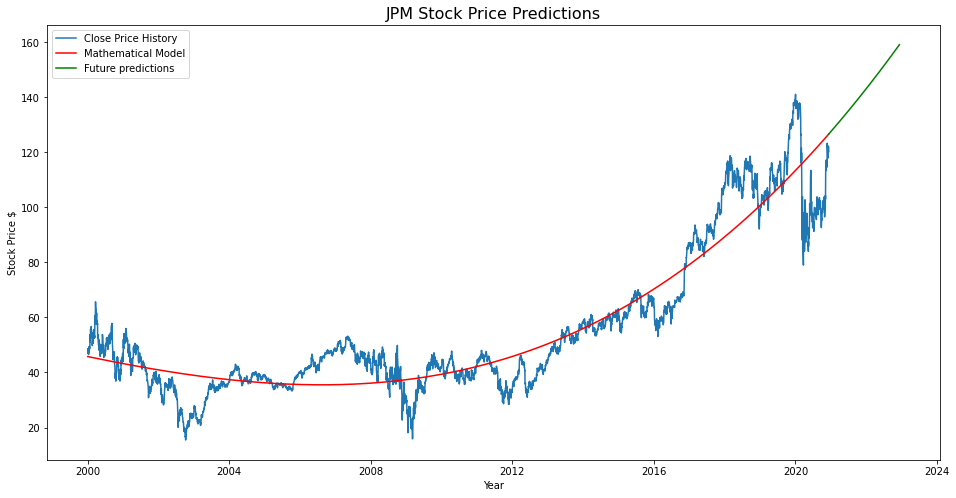

In [37]:
# Set plot figure size
plt.figure(figsize=(16,8))

# Plot the actual data
plt.plot(X,df['Close'], label='Close Price History')

# Plot the regression model line
plt.plot(X,y_pred, color='r', label='Mathematical Model')

# Plot the future predictions
plt.plot(future_X,y_future, color='g', label='Future predictions')

# Label the chart
plt.title('JPM Stock Price Predictions', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Stock Price $')

# Show legends
plt.legend()

# Show the chart
plt.show()

In [38]:
print('Coefficient of determination:',round(metrics.r2_score(y, y_pred),2))

Coefficient of determination: 0.87


In [39]:
print("RMSE (root-mean-square error) is:",round(np.sqrt(metrics.mean_squared_error(y, y_pred)),2))

RMSE (root-mean-square error) is: 9.59


In [40]:
print("Mean Squared Error is:", round(metrics.mean_squared_error(y, y_pred),2))

Mean Squared Error is: 92.02


In [41]:
print("Mean Absolute Error is:" , round(metrics.mean_absolute_error(y, y_pred),2))

Mean Absolute Error is: 7.19


#### Conclusion:

JPM stock predicted closing price on 2022-12-09 is $159.13
 
I think, we have moved little bit closer to the reality in terms of fitting the curve. 

Will this be reality? Probably not, let's to look at the techniques like FB prophet, ARIMA or LSTM that specific to time series data predictions.  